In [1]:
import geopandas as gpd
from pysal.lib import weights

/opt/anaconda3/lib/python3.9/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
areas = gpd.read_file('nj_sit__administrative.geojson')

In [3]:
areas_27 = areas.iloc[27:27 + 27].reset_index()

In [4]:
import pandas as pd
import seaborn as sns
from scipy.stats import powerlaw
import giddy
from giddy.markov import Spatial_Markov
from giddy.markov import Markov
import contextily as cx
from esda.moran import Moran
import locale
import numpy as np
import matplotlib.pyplot as plt

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [ ]:
# getting the data to work

In [5]:
population = pd.read_csv('Demografia - Demografia.csv.csv')

In [6]:
for i in population.iloc[:, 1:].columns:
    population[i] = population[i].astype(int)

In [7]:
areas = areas.iloc[:27, :]

In [8]:
geoms = areas.iloc[[0, 1, 2, 3, 4, 5, 9, 21, 22, 23, 24, 25, 26, 10,
13, 14, 15, 16, 17, 18, 19, 20, 11, 12], 7]

In [9]:
population = population.iloc[1:, :]
population['geometry'] = list(geoms)

In [10]:
population = gpd.GeoDataFrame(population, geometry = 'geometry')

In [ ]:
# power law demo

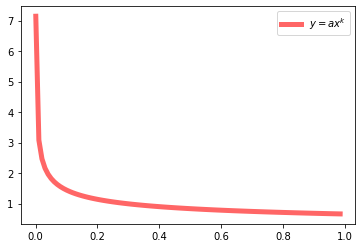

In [71]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(powerlaw.ppf(0.01, 0.659),
                powerlaw.ppf(0.99, 0.659), 100)
ax.plot(x, powerlaw.pdf(x, 0.659),
        'r-', lw=5, alpha=0.6, label='$ y = ax^k $');

ax.legend();

### Power Law (over the years): 2009, 2015, 2021

In [11]:
arr = np.array([i for i in range(len(population.iloc[1:]))])/24

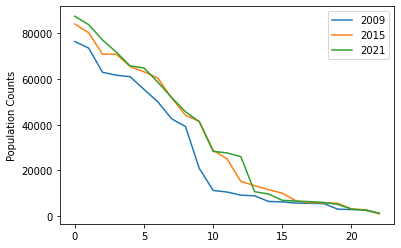

In [63]:
sns.lineplot(y = population['2009'].iloc[1:].sort_values(ascending = False), x = range(len(population.iloc[1:])), label = '2009');
sns.lineplot(y = population['2015'].iloc[1:].sort_values(ascending = False), x = range(len(population.iloc[1:])), label = '2015');
sns.lineplot(y = population['2021'].iloc[1:].sort_values(ascending = False), x = range(len(population.iloc[1:])), label = '2021');
plt.ylabel('Population Counts');

In [14]:
# explanations

In [15]:
# a bit more exploring: go into the highest change, lowest, average change?

In [16]:
population['change'] = population['2021'] - population['2009']

In [17]:
population[(population['2021'] - population['2009']) == 37835] # Kashar

,Njesia Administrative,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,geometry,change
5,Nja Kashar,20829,21524,22146,22933,23587,24306,25034,26304,37373,39631,47476,51622,58664,"POLYGON Z ((19.76789 41.32240 0.00000, 19.7669...",37835


In [18]:
population[(population['2021'] - population['2009']) == -9252] # Zall Herr

,Njesia Administrative,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,geometry,change
13,Nja Zall Herr,10515,10647,10762,10843,11007,1145,11548,11725,11973,12063,12212,12389,1263,"POLYGON Z ((19.86448 41.44586 0.00000, 19.8648...",-9252


In [19]:
population_fil = population[(population['change'] < 50000) & (population['change'] > -30000)]

In [20]:
population_fil.sort_values(by = 'change', ascending = False).head()

,Njesia Administrative,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,geometry,change
5,Nja Kashar,20829,21524,22146,22933,23587,24306,25034,26304,37373,39631,47476,51622,58664,"POLYGON Z ((19.76789 41.32240 0.00000, 19.7669...",37835
3,Nja Dajt,1147,1194,12364,1299,13834,14424,15195,16026,21218,22371,24267,26178,28315,"POLYGON Z ((19.89645 41.38585 0.00000, 19.8984...",27168
15,Nja10,2711,27534,27821,28117,28922,28998,28783,28969,27804,27965,27783,27608,27637,"POLYGON Z ((19.83380 41.33017 0.00000, 19.8318...",24926
4,Nja Farke,11206,11622,119,12148,12469,12865,13259,13768,17894,19209,2186,23595,26019,"POLYGON Z ((19.87214 41.33105 0.00000, 19.8723...",14813
22,Nja7,62973,64385,65001,66565,6841,699,70894,72016,72545,74034,7495,75793,77124,"POLYGON Z ((19.81106 41.35213 0.00000, 19.8110...",14151


In [21]:
# hypothesis: has the suburb experienced more urban growth?

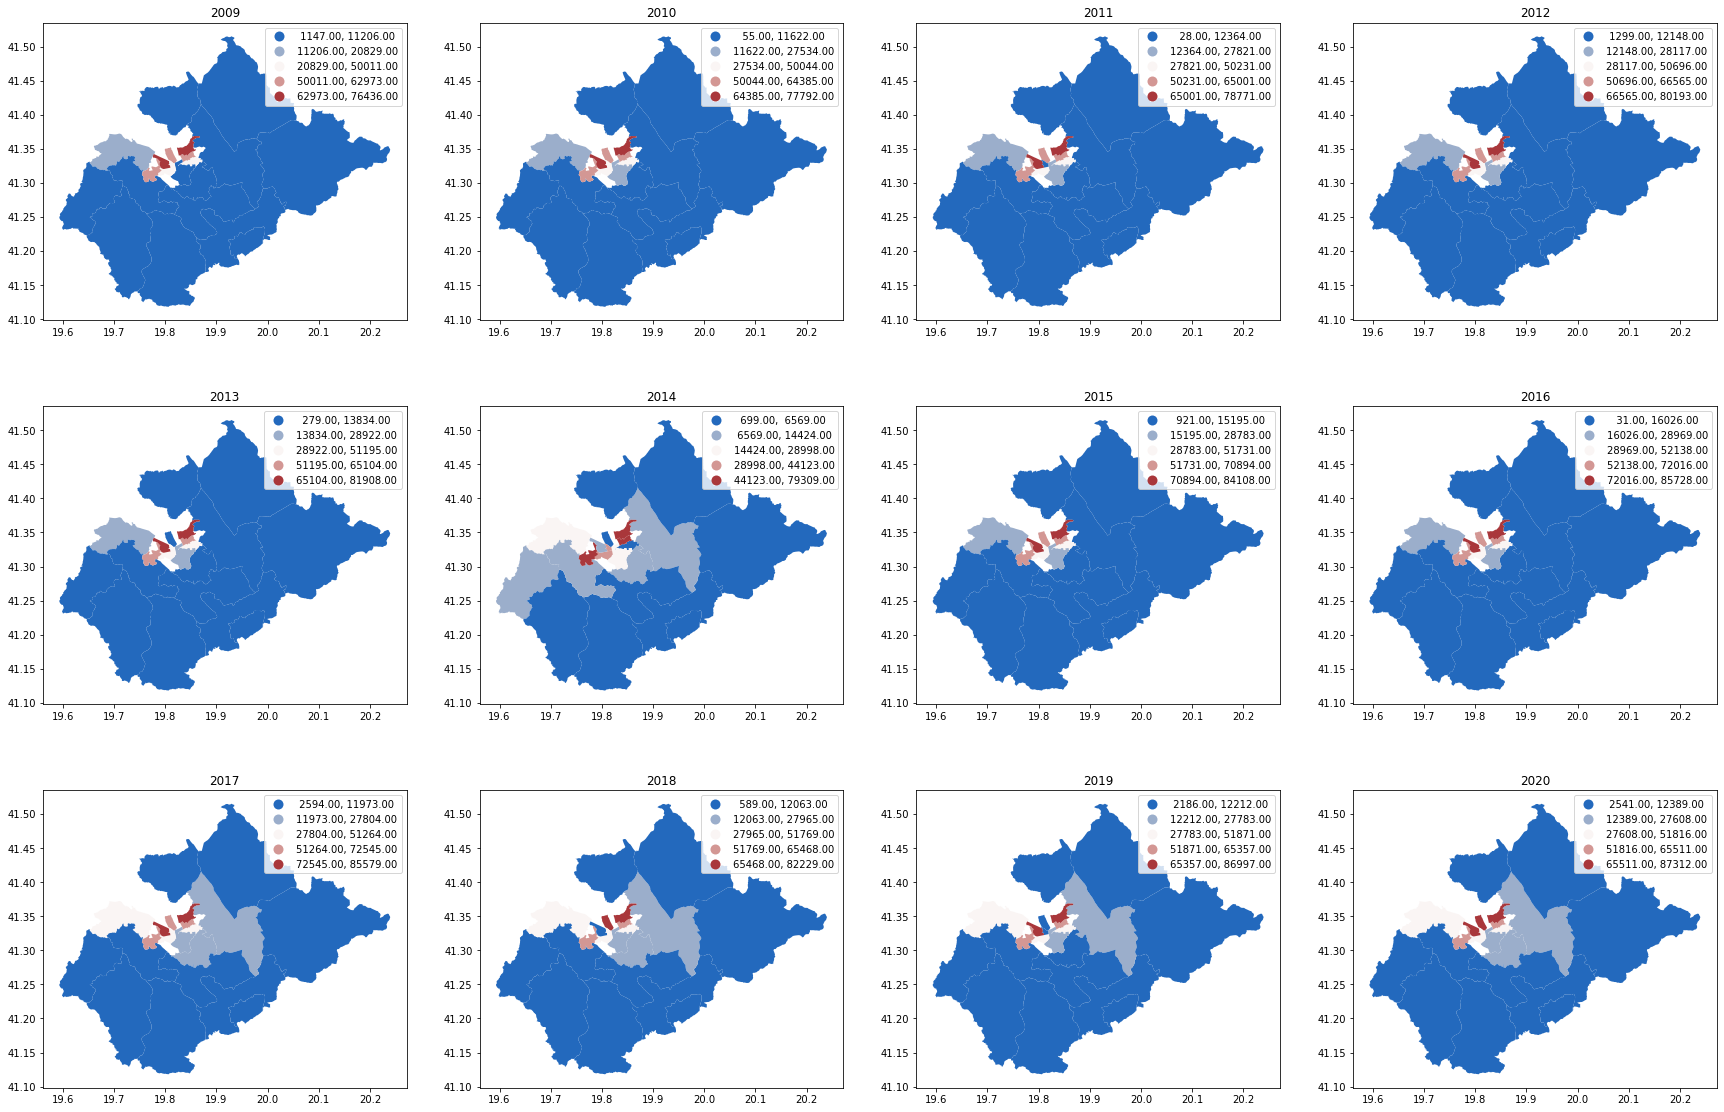

In [46]:
population_fil

fig, ax = plt.subplots(3, 4, figsize=(30,20))

population_fil.plot(ax=ax[0][0], column='2009', cmap = "vlag", legend = True, scheme = 'FisherJenks');
population_fil.plot(ax=ax[0][1], column='2010', cmap = "vlag", legend = True, scheme = 'FisherJenks');
population_fil.plot(ax=ax[0][2], column='2011', cmap = "vlag", legend = True, scheme = 'FisherJenks');
population_fil.plot(ax=ax[0][3], column='2012', cmap = "vlag", legend = True, scheme = 'FisherJenks');
population_fil.plot(ax=ax[1][0], column='2013', cmap = "vlag", legend = True, scheme = 'FisherJenks');
population_fil.plot(ax=ax[1][1], column='2014', cmap = "vlag", legend = True, scheme = 'FisherJenks');
population_fil.plot(ax=ax[1][2], column='2015', cmap = "vlag", legend = True, scheme = 'FisherJenks');
population_fil.plot(ax=ax[1][3], column='2016', cmap = "vlag", legend = True, scheme = 'FisherJenks');
population_fil.plot(ax=ax[2][0], column='2017', cmap = "vlag", legend = True, scheme = 'FisherJenks');
population_fil.plot(ax=ax[2][1], column='2018', cmap = "vlag", legend = True, scheme = 'FisherJenks');
population_fil.plot(ax=ax[2][2],  column='2019', cmap = "vlag", legend = True, scheme = 'FisherJenks');
population_fil.plot(ax=ax[2][3], column='2020', cmap = "vlag", legend = True, scheme = 'FisherJenks');
ax[0][0].set_title('2009');
ax[0][1].set_title('2010');
ax[0][2].set_title('2011');
ax[0][3].set_title('2012');
ax[1][0].set_title('2013');
ax[1][1].set_title('2014');
ax[1][2].set_title('2015');
ax[1][3].set_title('2016');
ax[2][0].set_title('2017');
ax[2][1].set_title('2018');
ax[2][2].set_title('2019');
ax[2][3].set_title('2020');

In [23]:
# specifics: Kashar, Dajt, Farke

In [24]:
urban = population.iloc[14:, :]

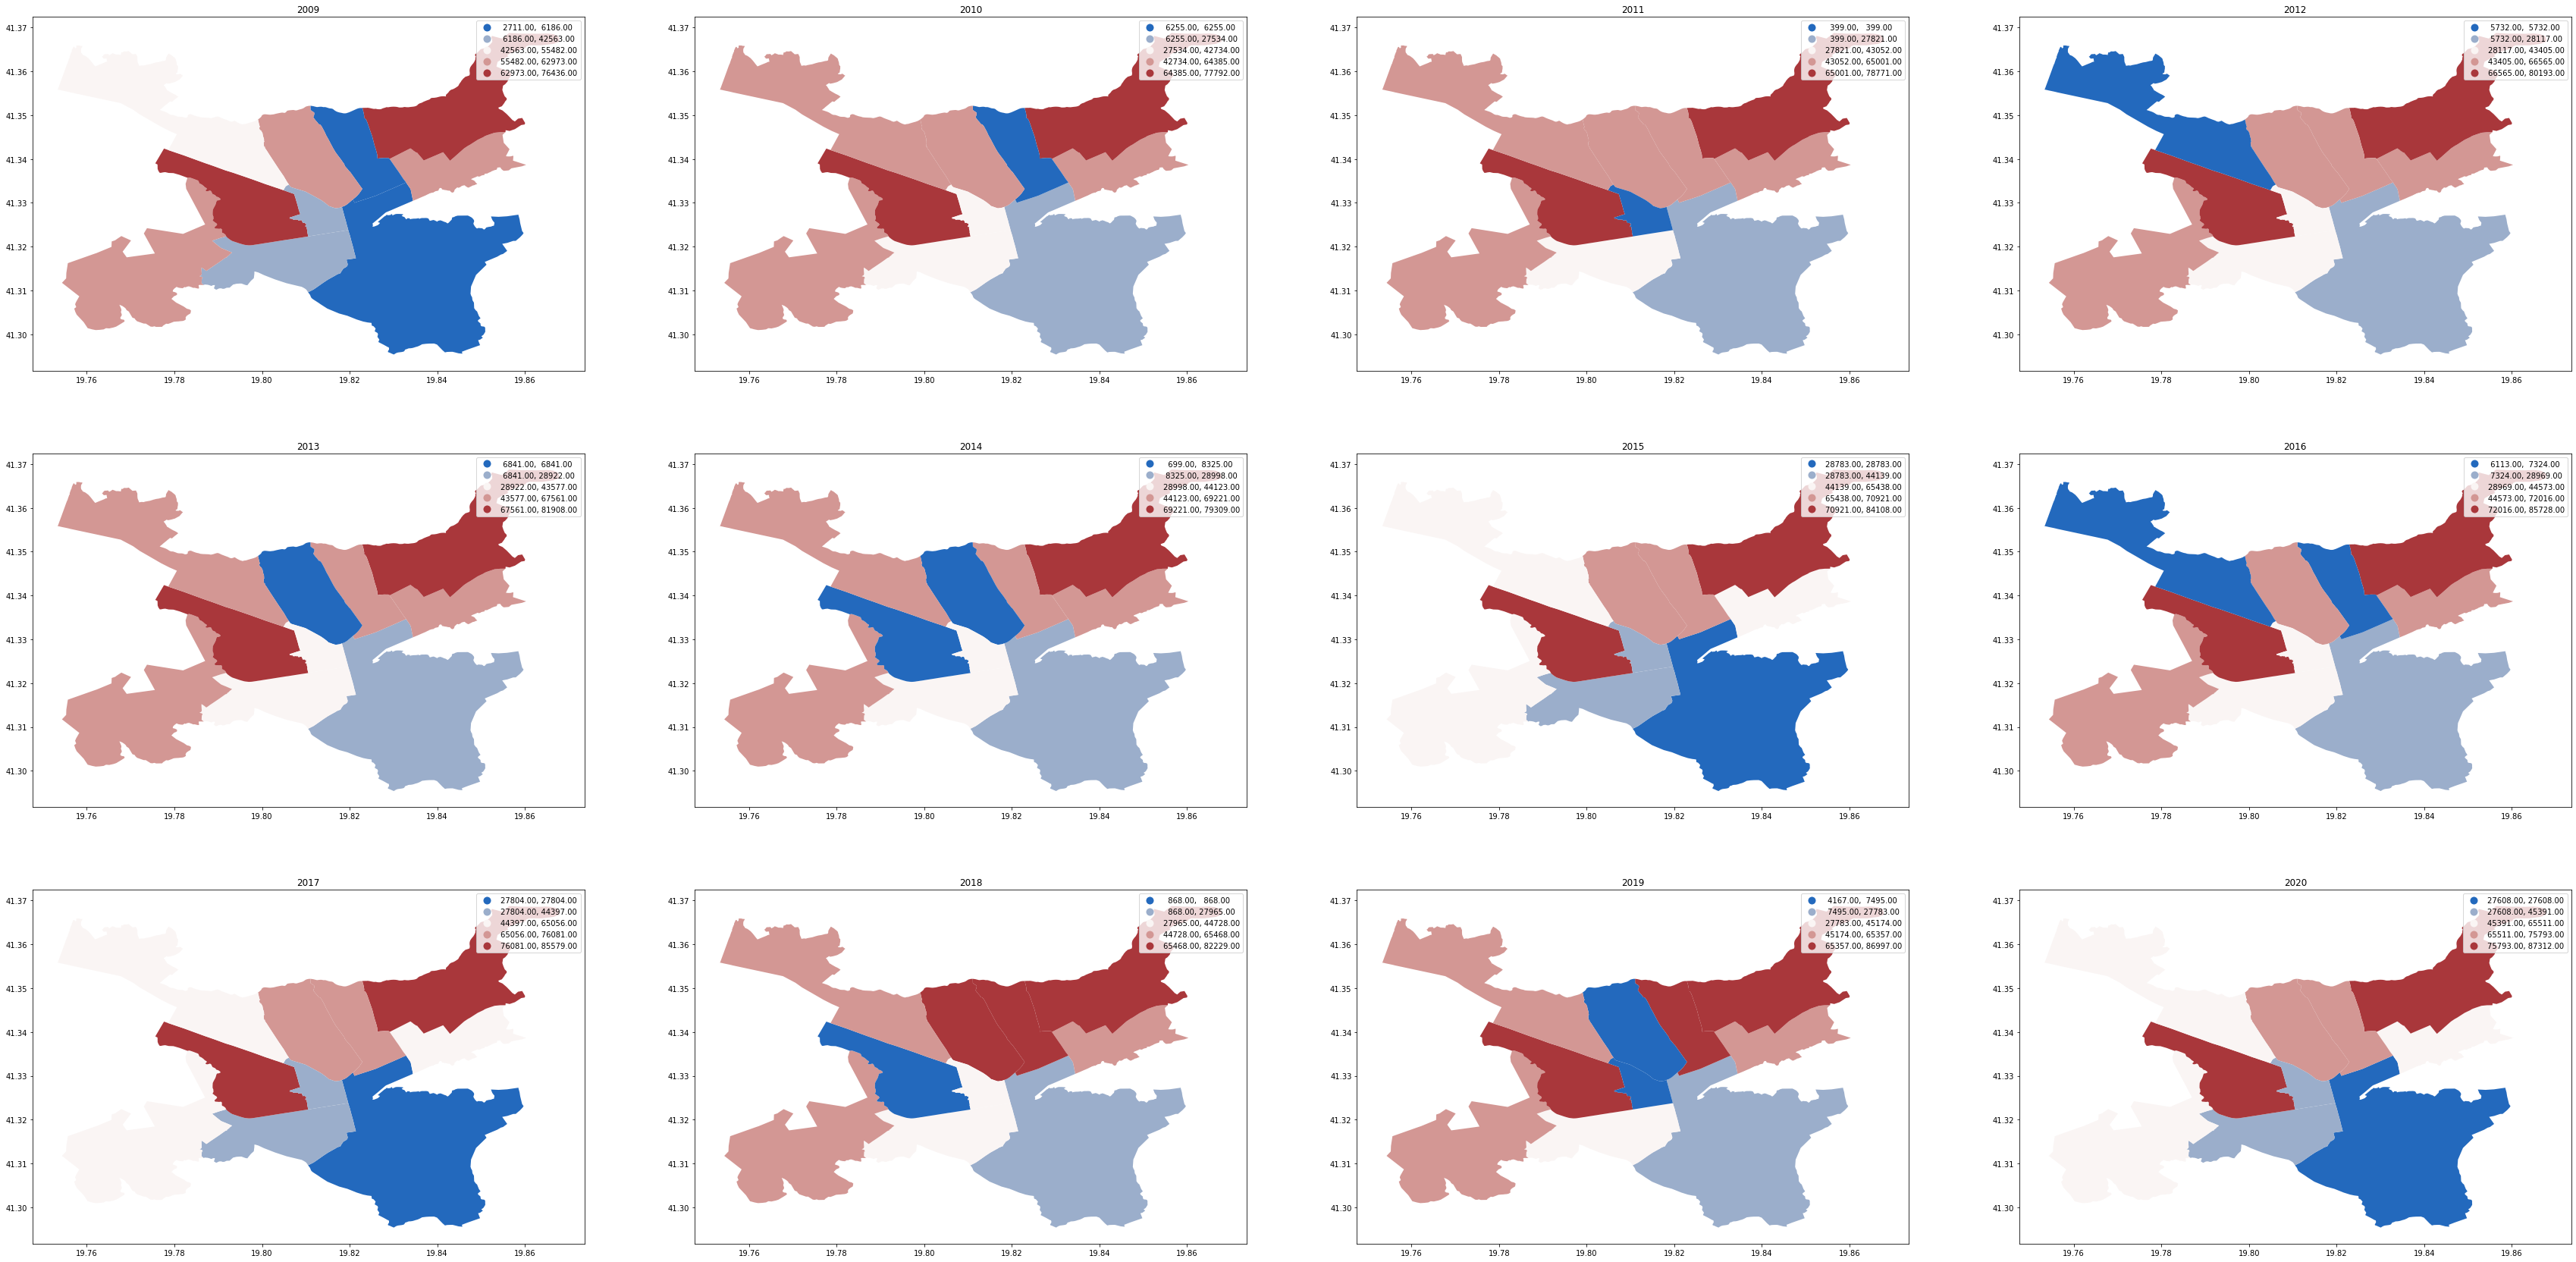

In [25]:
fig, ax = plt.subplots(3, 4, figsize=(60,30))

urban.plot(ax=ax[0][0], column='2009', cmap = "vlag", legend = True, scheme = 'FisherJenks');
urban.plot(ax=ax[0][1], column='2010', cmap = "vlag", legend = True, scheme = 'FisherJenks');
urban.plot(ax=ax[0][2], column='2011', cmap = "vlag", legend = True, scheme = 'FisherJenks');
urban.plot(ax=ax[0][3], column='2012', cmap = "vlag", legend = True, scheme = 'FisherJenks');
urban.plot(ax=ax[1][0], column='2013', cmap = "vlag", legend = True, scheme = 'FisherJenks');
urban.plot(ax=ax[1][1], column='2014', cmap = "vlag", legend = True, scheme = 'FisherJenks');
urban.plot(ax=ax[1][2], column='2015', cmap = "vlag", legend = True, scheme = 'FisherJenks');
urban.plot(ax=ax[1][3], column='2016', cmap = "vlag", legend = True, scheme = 'FisherJenks');
urban.plot(ax=ax[2][0], column='2017', cmap = "vlag", legend = True, scheme = 'FisherJenks');
urban.plot(ax=ax[2][1], column='2018', cmap = "vlag", legend = True, scheme = 'FisherJenks');
urban.plot(ax=ax[2][2],  column='2019', cmap = "vlag", legend = True, scheme = 'FisherJenks');
urban.plot(ax=ax[2][3], column='2020', cmap = "vlag", legend = True, scheme = 'FisherJenks');
ax[0][0].set_title('2009');
ax[0][1].set_title('2010');
ax[0][2].set_title('2011');
ax[0][3].set_title('2012');
ax[1][0].set_title('2013');
ax[1][1].set_title('2014');
ax[1][2].set_title('2015');
ax[1][3].set_title('2016');
ax[2][0].set_title('2017');
ax[2][1].set_title('2018');
ax[2][2].set_title('2019');
ax[2][3].set_title('2020');

### Moran

### Spatial 

In [26]:
population_fil.dropna().head()

,Njesia Administrative,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,geometry,change
1,Nja Baldushk,5271,5243,5323,5356,5369,5367,5356,5371,5329,5375,5375,5367,5342,"POLYGON Z ((19.78872 41.25826 0.00000, 19.7893...",71
2,Nja Berzhite,5681,5753,5812,5802,5835,5855,5861,5906,5891,5905,5874,5911,5936,"POLYGON Z ((20.01048 41.29406 0.00000, 20.0104...",255
3,Nja Dajt,1147,1194,12364,1299,13834,14424,15195,16026,21218,22371,24267,26178,28315,"POLYGON Z ((19.89645 41.38585 0.00000, 19.8984...",27168
4,Nja Farke,11206,11622,119,12148,12469,12865,13259,13768,17894,19209,2186,23595,26019,"POLYGON Z ((19.87214 41.33105 0.00000, 19.8723...",14813
5,Nja Kashar,20829,21524,22146,22933,23587,24306,25034,26304,37373,39631,47476,51622,58664,"POLYGON Z ((19.76789 41.32240 0.00000, 19.7669...",37835


In [76]:
w_queen = weights.contiguity.Queen.from_dataframe(population_fil.dropna())

In [77]:
w_queen.sparse.toarray().shape

(22, 22)

In [78]:
w_queen.transform = 'r'

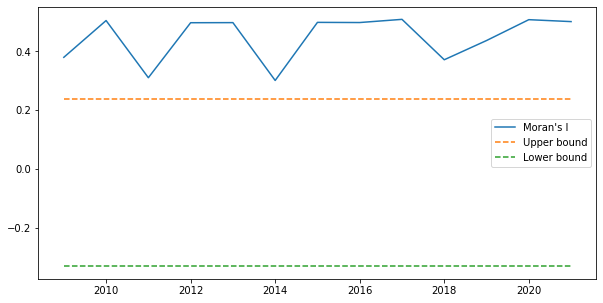

In [81]:
mits = [Moran(population_fil.dropna().iloc[:, 1:14][cs], w_queen) for cs in population_fil.dropna().iloc[:, 1:14]]
res = np.array([(mi.I, mi.EI, mi.seI_norm, mi.sim[974]) for mi in mits])
years = np.arange(2009,2022)
fig, ax = plt.subplots(nrows=1, ncols=1,figsize = (10,5) )
ax.plot(years, res[:,0], label='Moran\'s I');
ax.plot(years, res[:,1]+1.96*res[:,2], label='Upper bound',linestyle='dashed');
ax.plot(years, res[:,1]-1.96*res[:,2], label='Lower bound',linestyle='dashed');
ax.legend();

In [33]:
m = Spatial_Markov(population_fil.dropna().iloc[:, 1:14].to_numpy(), w_queen, fixed=True, variable_name='rpci')

In [34]:
m.cutoffs

array([ 5690.  , 12018.  , 50184.25])

Global: the chance that areas at each cutoff will remain in that cutoff:

- for the first bin: about 72 percent, 77 percent, 90 percent and 91 percent
- moving to the next bin: 4th to 3rd: about 17 percent, 2nd to 1st: about 15 percent

In [35]:
m.p

array([[0.74626866, 0.10447761, 0.10447761, 0.04477612],
       [0.10606061, 0.84848485, 0.01515152, 0.03030303],
       [0.07575758, 0.        , 0.89393939, 0.03030303],
       [0.03076923, 0.04615385, 0.        , 0.92307692]])

In [36]:
for p in m.P:
    print(p)
    
m.P.shape

[[0.925      0.075      0.         0.        ]
 [0.06896552 0.93103448 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
[[0.68421053 0.21052632 0.10526316 0.        ]
 [0.125      0.8125     0.03125    0.03125   ]
 [0.16666667 0.         0.83333333 0.        ]
 [0.         0.         0.         1.        ]]
[[0.         0.         0.5        0.5       ]
 [0.25       0.75       0.         0.        ]
 [0.07692308 0.         0.88461538 0.03846154]
 [0.03225806 0.06451613 0.         0.90322581]]
[[0.         0.         0.75       0.25      ]
 [0.         0.         0.         1.        ]
 [0.03571429 0.         0.92857143 0.03571429]
 [0.03225806 0.03225806 0.         0.93548387]]


(4, 4, 4)

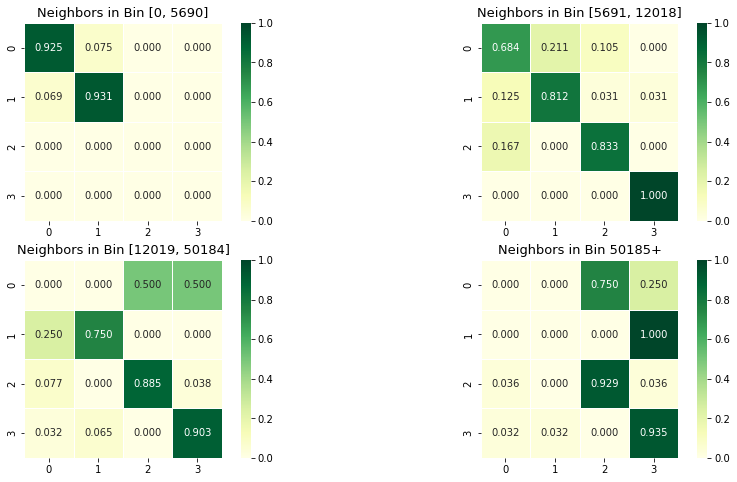

In [37]:
fig, axes = plt.subplots(2,2,figsize = (15,8))

p_temp = m.P[0]
im = sns.heatmap(p_temp, annot=True, linewidths=.5, ax=axes[0][0], cbar=True, vmin=0, vmax=1,
                          square=True, cmap="YlGn",fmt='.3f')
axes[0][0].set_title("Neighbors in Bin [0, 5690]",fontsize=13);

p_temp = m.P[1]
im = sns.heatmap(p_temp, annot=True, linewidths=.5, ax=axes[0][1], cbar=True, vmin=0, vmax=1,
                          square=True, cmap="YlGn",fmt='.3f')
axes[0][1].set_title("Neighbors in Bin [5691, 12018]",fontsize=13);

p_temp = m.P[2]
im = sns.heatmap(p_temp, annot=True, linewidths=.5, ax=axes[1][0], cbar=True, vmin=0, vmax=1,
                          square=True, cmap="YlGn",fmt='.3f')
axes[1][0].set_title("Neighbors in Bin [12019, 50184]",fontsize=13);

p_temp = m.P[3]
im = sns.heatmap(p_temp, annot=True, linewidths=.5, ax=axes[1][1], cbar=True, vmin=0, vmax=1,
                          square=True, cmap="YlGn",fmt='.3f')
axes[1][1].set_title("Neighbors in Bin 50185+",fontsize=13);

